# Week5: Euler/Verlet

Name: Manav Bilakhia

Date: 4/10/2022

## Library Imports Go Here

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import time
import statistics
import random
from time import sleep
import scipy
import pandas as pd

## Basic Euler Method

### Building the Algorithm

<font color = blue>
Construct an algorithm that implements the basic Euler method to solve the first order differential equation

$$
\frac{dx}{dt} = F((x(t), t)
$$

It should take as inputs the function $F$ (assumed to be of two variables), the initial value $x_0$, the step size $\Delta t$, and the total number of steps $N$.  It should output two lists of $N+1$ elements, the first of which is of the form $\{t_n\}$ with first element $0$, and the second of which is of the form $\{x_n\}$, with first element $x_0$.

In [2]:
def euler(F, x0, delta_t, N):
    t_n = np.array([0.0]) #part of the initial condition
    x_n = np.array([x0])  #part of the initial condition
    for i in range(1,N+1): # looping for a given number of steps 
        t = t_n[i-1]+ delta_t # calculating the next t value 
        x = x_n[i-1]+ (F(x_n[i-1], t_n[i-1])*delta_t)#calculating the new x value using the previous x value
        t_n = np.append(t_n, t) #storing t values in an array
        x_n = np.append(x_n,np.array([x]),axis = 0) #storing x values in an array and making sure the shape is consistent
    return x_n, t_n #returning the arrays

The above function employees the Euler method of solving first-order ordinary differential equations 

### Initial Testing

<font color = blue>
Consider the differential equation

$$
\frac{dx}{dt} = -x
$$

with the initial condition $x_0 = 10$.

#### Analytic Solution

<font color = blue>
First, determine the analytic solution to this differential equation (show your work)

Analytical solution:

$\frac{dx}{dt} = -x$

Using separation of variables:

$\frac{-1}{x} dx = dt$

Integrating on both sides:

$\int{\frac{-1}{x} dx} = \int{dt}$

$ ln |x| = -t + c$

$x = Ae^{-t}$

We know that $x_{0} = 10$ therefore $A = 10$ and we get:

$ x = 10e^{-t}$

#### Numerical Solution

<font color = blue>
Then, use step size of $\Delta t = 0.01$, and carry the solution out to $N = 1000$ steps, using your Euler code.

In [3]:
def F(x,t): # mathematical function given above
    return -x
x_n, t_n = euler(F, 10, 0.01, 1000) #using Euler's method

Here we are testing the Eulers method on a very simple ode and we will compare it with its analytical solution

#### Comparison

<font color = blue>
    Plot the two together, and visually confirm that they agree.

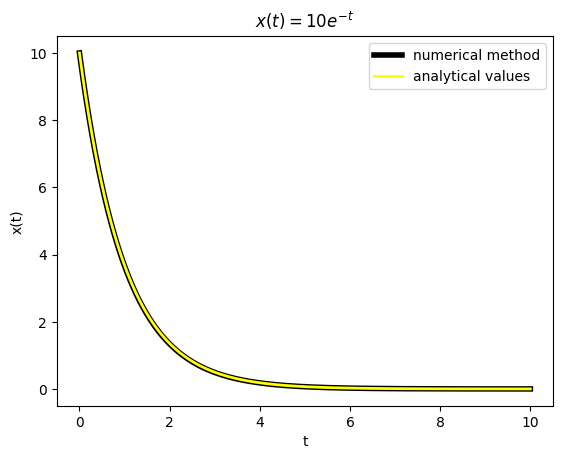

In [4]:
x = 10*np.exp(-t_n) #the analytical solution to the ODE
plt.plot(t_n, x_n, label = "numerical method", color = 'black', linewidth = 4) #plotting the numerical method values
plt.plot(t_n, x, label = "analytical values", color = "yellow", linewidth = 2) #plotting the analytical method values
plt.xlabel("t") #xlabel
plt.ylabel("x(t)") #ylabel
plt.title("$x(t) = 10e^{-t}$") #graph title, the equation
plt.legend() 
plt.show()

Here, the curve in black shows our results from the numerical method and the yellow curve shows our analytical values. We see them overlapping pretty well thereby concluding that the Euler's method is a good approximation for first order Ordinary differential equations.

### Examining Global Error

<font color = blue>
Next, we will use the differential equation

$$
\frac{dx}{dt} = t
$$

to test the accumulated global error in the Euler method, which is in principle $\mathcal{O}(\Delta t)$.  This is, again, a differential equation you can quickly solve by hand.  It is also a problem where the results of using the Euler methd are possible to predict exactly.

What we want to do is compare the analytic result for $x(1)$ ($x$ evaluated at $t = 1$) with the numerical one generated by the Euler method for a particular step size $\Delta t = \frac{1}{N}$, where $N$ is the total number of steps.

In this case, not only is it possible to solve the differential equation analytically, it is also possible to work out exactly what the discrete answer will be after $N$ steps with step size $\Delta t$.  Our goal here is to do this, and confirm that our code behaves as expected.

#### Analytic Solution to Differential Equation

<font color = blue>
First, Solve the differential equation analytically, assuming initial condition $x_0 = 0$ (and show your work.)  Determine what $x(1)$ is. 

$\frac{dx}{dt} = t$

Using separation of variables:

$dx = t dt$

$\int{dx} = \int {t dt}$

Integrating on both sides:

$x = \frac{t^2}{2} +c$

$x(1) = \frac{1}{2}$

#### Analytic Solution to Euler Method

<font color = blue>
Next, determine analytically what the Euler method applied to this differential equation should give for $x_N$, with $N = \frac{1}{\Delta t}$ (this is the Euler method evaluated at $t = 1$).  Based on this, determine what the discrepancy should be at $t = 1$ between the analytic solution and the numerical one.

For $x_{1}$

$x_0 = 0, t_{0} = 0$

$x_{1} = 0+ F_{0} \Delta t$ but $F_{0} = t_{0} = 0$

$= 0+0$

$= 0$

For $x_{2}$

$x_{1} = 0$, $t_{1} = \Delta t$

$x_{2} = 0+ F_{1} \Delta t$ but $F_{1} = t_{1} = \Delta t$

$= 0+(\Delta t)^2$ but $\Delta t = \frac{1}{N}$

$= \frac{1}{N^2}$

for $x_{3}$

$x_{2} = (\Delta t)^2$ and $t_{2} = 2\Delta t$

$x_{3} = (\Delta t)^2 +  F_{2} \Delta t$ but $F_{2} = t_{2} = 2\Delta t$

$ = 3 (\Delta t)^2 $

$ = \frac{3}{N^2}$

Hence, We can deduce that $x_{N} = \frac{N^2-N}{2N^2} = \frac{1}{2} - \frac{1}{2N}$ 

The analytical value for $x(1) = 0.5$

We know that $\Delta t = 0.01$. Therefore in-order for t = 1, N = 100. 

Using our earlier deduction that $x_{N}$ we know $x_{100} = \frac{1}{2} - \frac{1}{2(100)}$ 

$x_{100} = 0.495$

analytically  $x(1) = 0.5$ and numerically $x(1) = 0.495$

Therefore discrepency between the two  = $0.5-0.495 = 0.005$

#### Discrepancy

<font color = blue>
Finally, create a function that takes as its input just $N$, and outputs the magnitude of the difference $\delta$ between the analytic solution $x(1)$ and the numerical approximation to it (using your Euler code).  Use this to generate data for $\Delta t$ vs. $\delta$ with $N$ in the range $[10, 1000]$ and then plot the results.  Are they consistent with the expected global error behavior?

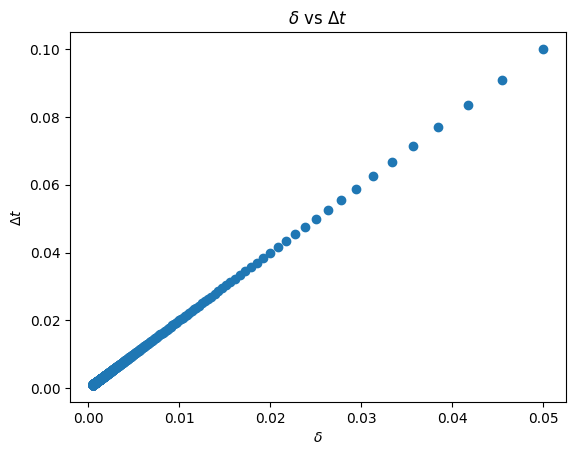

In [5]:
def error(N): #mathematical function describing the error
    return 1/(2*N)
n_list = np.linspace(10, 1000, 991) #list of n values in a given range

t_list = 1/n_list #getting values of t from N
error_list = error(n_list) # calculating values of 𝛿 
plt.xlabel("$\\delta$") #xlabel
plt.ylabel("$\\Delta t$") #ylabel
plt.title ("$\\delta$ vs $\\Delta t$") # title
plt.scatter(error_list, t_list) #plotting the points
plt.show()

According to the Euler method, $x_N = x_{N-1} + F(x_{N-1}, (N-1) \Delta t) \Delta t$

The method ignores the $\mathcal{O}(\Delta t^2)$ term. Therefore the error comes from  $\mathcal{O}(\Delta t)$ such that $\Delta t = \frac{1}{N}$. This relation of being directly proportional can be seen in the graph above when we plot $\Delta t $ vs $\delta$. 

## Instability in the Euler Method

### Euler for a Second Order Differential Equation

<font color = blue>
Use the Euler algorithm to find a numerical solution to the second order differential equation

$$
\frac{d^2x}{dt^2} = -4\pi^2 x \, ,
$$

with the initial conditions $x_0 = 1$, $v_0 = 0$.  Set $\Delta t = 0.01$, and $N = 500$.  

Hint: if used correctly, you should be able to use the same code from the first part of this assignment to solve this *second order* differential equation!

Find the analytic solution with these initial conditions as well, and plot the two together.

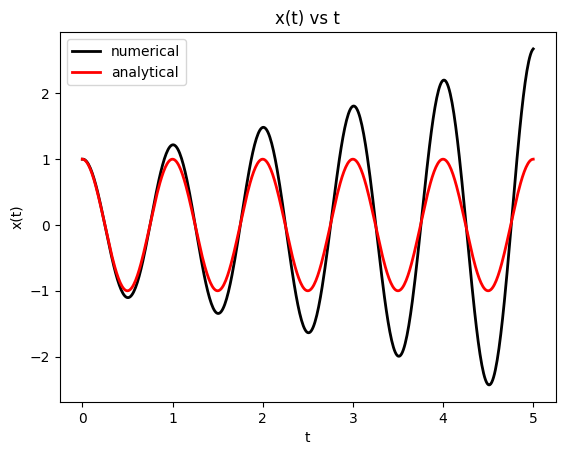

In [6]:
def G(f_n, t_n): #mathematical function 
    return np.array([f_n[1], -4*(np.pi**2)* f_n[0]]) #f_n[0] = positon, F_n[1] = velocity, returns a list with velocity and acceleration
x_n, t_n = euler(G, [1.0,0.0], 0.01, 500)# getting the lists from the Euler method

x_vals = np.array([x_n[i][0]for i in range (len (x_n))])# getting position vals from the meshed list
v_vals = np.array([x_n[i][1]for i in range (len (x_n))])# getting velocity vals from the meshed list

def theory(t): #mathematical function that returns the theoritical values
    return np.cos(2*np.pi*t)

    
plt.plot(t_n,x_vals, linewidth = 2.0, color = 'black', label = "numerical") #numerical curve
plt.plot(t_n,theory(t_n), linewidth = 2.0, color = 'red', label = "analytical") #analytical curve
plt.xlabel("t")# xlabel
plt.ylabel("x(t)")# ylabel
plt.title("x(t) vs t")#title
plt.legend()
plt.show()

This plot clearly shows that Euler's method does not approximate a second order differential that well as we see that with increase in time the difference between the numerical and analytical value increases. 

### Dependence on $\Delta t$

<font color = blue>
Decrease the value of $\Delta t$ by a factor of 2.  Confirm that while over the same time scale used above we see less growth, if we double the time scale the amount of growth is comparable.

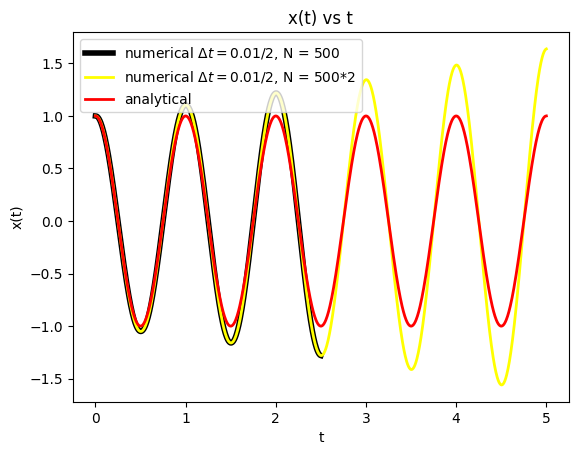

In [7]:
def G(f_n, t_n): #mathematical function 
    return np.array([f_n[1], -4*(np.pi**2)* f_n[0]]) #f_n[0] = positon, F_n[1] = velocity, returns a list with velocity and acceleration
x_n1, t_n1 = euler(G, [1.0,0.0], 0.01/2, 500)# getting the lists from the Euler method
x_n2, t_n2 = euler(G, [1.0,0.0], 0.01/2, 500*2)# getting the lists from the Euler method
x_vals1 = np.array([x_n1[i][0]for i in range (len (x_n1))])# getting position vals from the meshed list
v_vals1 = np.array([x_n1[i][1]for i in range (len (x_n1))])# getting velocity vals from the meshed list
x_vals2 = np.array([x_n2[i][0]for i in range (len (x_n2))])# getting position vals from the meshed list
v_vals2 = np.array([x_n2[i][1]for i in range (len (x_n2))])# getting velocity vals from the meshed list

def theory(t): #mathematical function that returns the theoritical values
    return np.cos(2*np.pi*t)

    
plt.plot(t_n1,x_vals1, linewidth = 4.0, color = 'black', label = "numerical $\\Delta t = 0.01/2$, N = 500") #numerical curve
plt.plot(t_n2,x_vals2, linewidth = 2.0, color = 'yellow', label = "numerical $\\Delta t = 0.01/2$, N = 500*2") #numerical curve
plt.plot(t_n2,theory(t_n2), linewidth = 2.0, color = 'red', label = "analytical") #analytical curve
plt.xlabel("t")# xlabel
plt.ylabel("x(t)")# ylabel
plt.title("x(t) vs t")#title
plt.legend()
plt.show()

For the graph above, we follow the same exact method of extracting values and comparison. THe only difference is that we have now changed our value of $\Delta t$ by a factor of 2. While this still does not give us a good approximation for the differential equation, it is certainly better than what we had earlier.

discussion goes here

### Growth Correction

<font color = blue>
Add an artificial damping term to the original differential equation so that we have

$$
\frac{d^2x}{dt^2} = -4\pi^2x - 2\beta\frac{dx}{dt}
$$

as our differential equation.  Use the same initial conditions as in the previous section, and set $\Delta t = .01$ and $N = 500$.  Choose the value of $\beta$ so that the damping cancels out the parasitic growth of the numerical solution.  Again plot the result against the analytic solution -- not to this differential equation but to the original equation studied above.

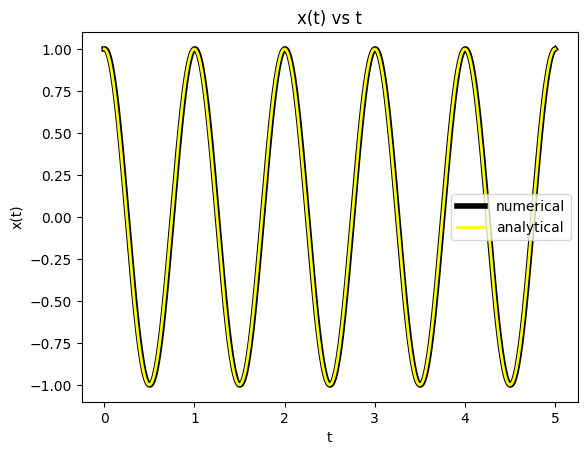

In [8]:
def G(f_n, t_n):# function with incorporated growth correction
    beta = 4*np.pi**2 *delta_t / 2 #the growth corection factor
    return np.array([f_n[1],-4*np.pi**2*f_n[0] - 2 * beta*f_n[1]]) #returns vector with corrected values
delta_t = 0.01

x_n, t_n = euler(G, [1.0,0.0], 0.01, 500)# getting the lists from the Euler method

x_vals = np.array([x_n[i][0]for i in range (len (x_n))])# getting position vals from the meshed list
v_vals = np.array([x_n[i][1]for i in range (len (x_n))])# getting velocity vals from the meshed list

plt.plot(t_n,x_vals, linewidth = 4.0, color = 'black', label = "numerical") #numerical curve
plt.plot(t_n,theory(t_n), linewidth = 2.0, color = 'yellow', label = "analytical") #analytical curve
plt.xlabel("t")# xlabel
plt.ylabel("x(t)")# ylabel
plt.title("x(t) vs t")#title
plt.legend()
plt.show()

We see here that the numerical and analytical values overlap. This means that the correction factor that we introduced works for this given ODE. The correction factor $\beta$ represents damping which counters the extra growth we saw in the plots above.

## The Pendulum

<font color = blue>
Consider the system (which does not have an analytic solution)

$$
\frac{d^2\theta}{dt^2} = -\sin\theta - 2\beta\dot{\theta}
$$

which represents a pendulum with a damping term.  (The system has been suitably non-dimensionalized, so that the dimensionful fator $\frac{g}{\ell}$ which would usually appear in front of the $\sin\theta$ has been absorbed into a redefinition of time.  The damping factor $\beta$ has also been rescaled to be dimensionless.)  We are actually interested in the simple pendulum without the damping term, but as in the previous section, we will need to introduce an artificial damping term to counteract the parasitic numerical growth.

### Growth

<font color = blue>
First attempt to solve the system numerically with $\beta = 0$, using initial conditions $\theta_0 = 1$ and $\dot{\theta}_0 = 0$.  Confirm that, as usual, we obtain un-physical growth of the solution.  Use $\Delta t = 0.01$ and $N = 30000$.  Graph your results, and include horizontal lines at $\theta = \pm \pi$.  What happens around $t = 270$?  (Hint: think about the possible ways in which a rigid rod pendulum can move.)

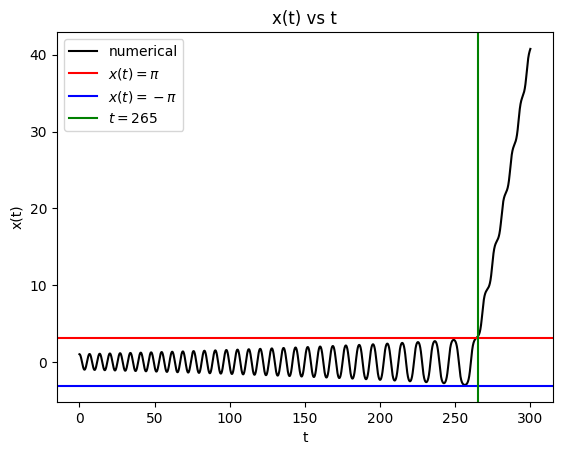

In [9]:
def pendulum(f_n, t_n): #mathematical function which represents a pendulum with damping
    return np.array([f_n[1],-np.sin(f_n[0]) - 2 * beta*f_n[1]])
beta = 0 #the growth corection factor
x_n, t_n = euler(pendulum, [1.0,0.0], 0.01, 30000) # getting the lists from the Euler method

x_vals = np.array([x_n[i][0]for i in range (len (x_n))])# getting position vals from the meshed list

plt.plot(t_n,x_vals, color = 'black', label = "numerical") #numerical curve
plt.axhline(y = math.pi, color = 'r', linestyle = '-',label = "$x(t) = \\pi$") #pi
plt.axhline(y = -math.pi, color = 'b', linestyle = '-',label = "$x(t) = -\\pi$")#-pi
plt.axvline(x = 265, color = 'green', linestyle = '-',label = "$t = 265$")# t = 265
plt.xlabel("t") #xlabel
plt.ylabel("x(t)")#ylabel
plt.title("x(t) vs t")#title
plt.legend()
plt.show()

There is constant growth before t = 260 and at t = 265, we see that the value of $x(t) =\pi$. We see that after $x(t) = \pi$, a rigid rod pendulum would essentially stop moving although numerically, the computer still tries to compute it by constantly adding to $x(t)$.  

### Correction

<font color = blue>
Determine (by trial and error) a value $\beta$ that, when used in the damped pendulum differential equation ends up canceling out the numerical growth exactly so that we obtain a numerical solution that is something like an "undamped pendulum".  Use the same initial conditions as in the previous part.

Then, use the initial conditions $\theta_0 = 0.5$ and $\dot{\theta}_0 = 0$, and repeat the exercise.  What happens to the necessary value of $\beta$?  What does that mean for the value of the "artificial damping correction" technique for fixing the Euler method?

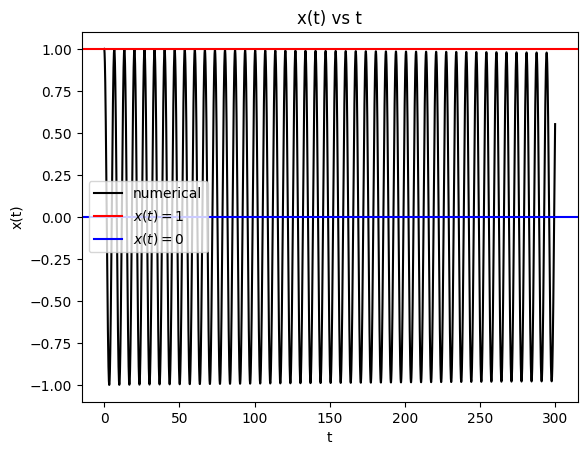

In [10]:
beta = 0.00449 # correction factor computed by trial and error
x_n, t_n = euler(pendulum, [1.0,0.0], 0.01, 30000)   # getting the lists from the Euler method

x_vals = np.array([x_n[i][0]for i in range (len (x_n))])# getting position vals from the meshed list

plt.plot(t_n,x_vals, color = 'black', label = "numerical") #numerical curve
plt.axhline(y = 1, color = 'r', linestyle = '-',label = "$x(t) = 1$") #1
plt.axhline(y = 0, color = 'b', linestyle = '-',label = "$x(t) = 0$") #0
plt.xlabel("t") #xlabel
plt.ylabel("x(t)")#ylabel
plt.title("x(t) vs t")#title
plt.legend()
plt.show()

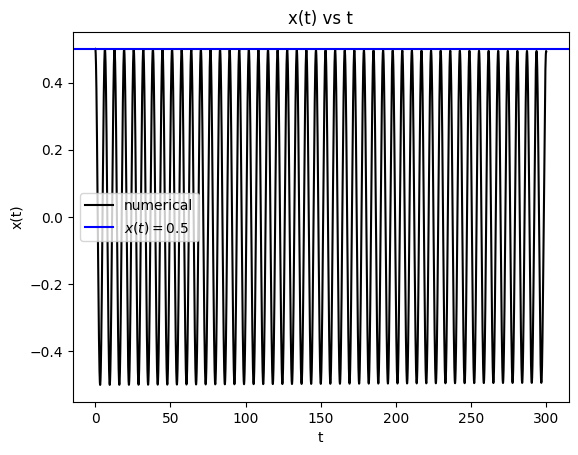

In [11]:
beta = 0.00489 # correction factor computed by trial and error
x_n, t_n = euler(pendulum, [0.5,0.0], 0.01, 30000)   # getting the lists from the Euler method

x_vals = np.array([x_n[i][0]for i in range (len (x_n))])# getting position vals from the meshed list

plt.plot(t_n,x_vals, color = 'black', label = "numerical") #numerical curve
plt.axhline(y = 0.5, color = 'b', linestyle = '-',label = "$x(t) = 0.5$")# 0.5
plt.xlabel("t") #xlabel
plt.ylabel("x(t)")#ylabel
plt.title("x(t) vs t")#title
plt.legend()
plt.show()

In the first graph, we had to find an appropriate vale of beta by constant trial and error for a given equation with a given set of initial values. Here $\beta = 0.00449$ shows the best behavior. As seen in the second graph, even with the same equation with different initial conditions, we see that we have a completely different value for beta. In this case $\beta = 0.00489$ shows the best behavior

## The Verlet Function

<font color = blue>
The Verlet method is designed to solve a second order differential equation, in the form

$$
\frac{d^2x}{dt^2} = F(x, \dot{x}, t)
$$

### Basic Code

<font color = blue>
Create a function that will implement the Verlet method.  Your code should input a function in the form $F(x, v, t)$, initial conditions $x_0$ and $v_0$, a step size $\Delta t$ and a total number of steps $M$.  It should output a pair of lists: times $\{t_n\}$ and positions $\{x_n\}$.

In [12]:
def verlet(F, x0, v0, delta_t, M):
    prev_x = x0-(v0 *delta_t) #M = -1 value of position
    x_n = np.array([prev_x,x0]) #storing M-1 and M value
    t_n = np.array([-delta_t, 0]) #storing M-1 and M value
    v_n = np.array([])#empty array for velocities
    for i in range (M+1): #looping for M events
        x_to_add = 2*x_n[i+1] - x_n[i] + (F(x_n[i+1], v0, t_n[i+1]))*delta_t**2 # calculating the new position
        x_n = np.append(x_n, x_to_add) # adding the value to the array
        v0 = (x_n[i+2]-x_n[i+1])/delta_t #calculating the velocity
        t_to_add = t_n[i+1]+ delta_t  #calculating the next t value
        t_n = np.append(t_n, t_to_add) #adding the value to the array
        v_n = np.append(v_n, v0) # adding the value to the array
    x_n = x_n[2:] # slicing out the M = -1 and M = 0 elements, not needed. getting in correct shape with the velocity array
    t_n = t_n[2:]  # slicing out the M = -1 and M = 0 elements, not needed. getting in correct shape with the velocity array
    return x_n, t_n, v_n # return position, t, velocity arrays

discussion goes here

### Testing the Code

<font color = blue>
Test your code using the (dimensionless) equation for relativistic motion with a constant force:

$$
\frac{d^2x}{dt^2} = \left(1 - \left(\frac{dx}{dt}\right)^2\right)^{3/2}
$$

Choose $x_0 = v_0 = 0$, step size $\Delta t = 0.01$, and $M = 1000$ total steps.  Show the results together with a plot of the theoretical particle trajectory, which is

$$
x(t) = \sqrt{1 + t^2} - 1
$$

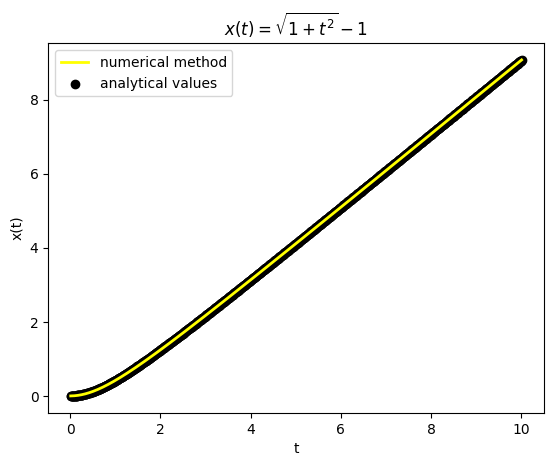

In [13]:
def test2(x, v, t):  # mathematical function given above
    return (1-v**2)**(3/2)
x_n, t_n , v_n= verlet(test2, 0, 0, 0.01, 1000) #using Verlet's method
x = np.sqrt(1+t_n**2)-1  #the analytical solution to the ODE
plt.plot(t_n, x_n, label = "numerical method", color = 'yellow',linewidth=2) #plotting the numerical method values
plt.scatter(t_n, x, label = "analytical values", color = "black")#plotting the analytical method values
plt.xlabel("t") #xlabel
plt.ylabel("x(t)") #ylabel
plt.title("$x(t) = \\sqrt{1+t^{2}}-1$") #graph title, the equation
plt.legend() 
plt.show()

Here, the curve in yellow shows our results from the numerical method and the black curve shows our analytical values. We see them overlapping pretty well thereby concluding that the Verlet's method is a good approximation for second order Ordinary differential equations.

### Discrepancies

<font color = blue>
A more effective way to examine way to examine the accuracy of a numerical method is to compute discrepancies.  Using the theoretical trajectory, compute the differences between the theoretical positions and the numerical positions, and display these in a plot.  Do this for $\Delta t= 0.01$ and $M = 1000$.  Then, repeat the process, using $\Delta t = 0.001$ and $M = 10000$.

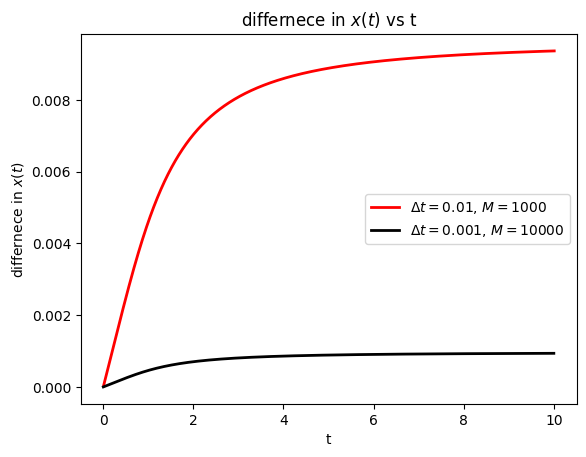

In [14]:
data1 = verlet(test2, 0,0, 0.01, 1000) #getting data using the verlet method
data2 = verlet(test2, 0,0, 0.001, 10000) #getting data using the verlet method
x1 = np.sqrt(1+data1[1]**2)-1 #getting theoritical values
x2 = np.sqrt(1+data2[1]**2)-1 #getting theoritical values
plt.plot(data1[1], data1[0] - x1, label = "$\\Delta t = 0.01$, $M = 1000$", color = 'red',linewidth=2) #plotting the difference
plt.plot(data2[1], data2[0] - x2, label = "$\\Delta t = 0.001$, $M = 10000$", color = 'black',linewidth=2) #plotting the difference
plt.xlabel("t") #xlabel
plt.ylabel("differnece in $x(t)$")  #ylabel
plt.title("differnece in $x(t)$ vs t") #title
plt.legend()
plt.show()

Here we see that with a higher step and a lower value of M, we get a very high difference between the analytical and numerical values. On the other hand we see that with a lower step and a higher value of M, we get a much lower difference between the two with the lower black curve almost plateauing at t = 3 which is much earlier than the red curve which seems to plateau at t = 6.5  

## Relativistic Springs

<font color = blue>
The differential equation for the relativistic spring (in dimensionless form) is

$$
\ddot{x} = -x(1 - \dot{x}^2)^{3/2}
$$

### * Non-Relativistic Limit

<font color = blue>
Create a plot showing position vs. time in the relativistic spring system for the initial conditions $v_0 = 0$, $x_0 = .01$, together with a plot of the non-relativistic analytic result.  Use $\Delta t = 0.001$, and $M = 100000$.

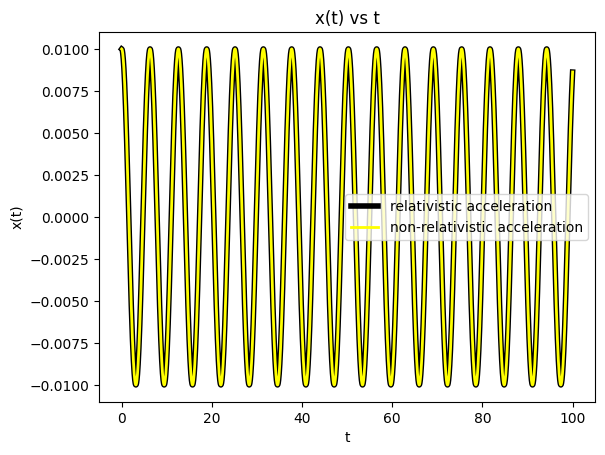

In [15]:
# this plot takes a lot of time to make
def rel_acceleration(x,v, t):# Mathematical function for the relativistic case
    return -x * (1-v**2)**(3/2)

def non_rel_acceleration(t):# Mathematical function for the non-relativistic case
    return 0.01 * np.cos(t) 
x_n, t_n, v_n= verlet(rel_acceleration, 0.01, 0, 0.001, 100000) #getting data using the verlet method

plt.plot(t_n, x_n, label = "relativistic acceleration", color = "black", linewidth = 4) #relativistic
plt.plot(t_n, non_rel_acceleration(t_n), label = "non-relativistic acceleration", color = "yellow", linewidth = 2) #non relativistic
plt.xlabel("t") #xlabel
plt.ylabel("x(t)")#ylabel
plt.title("x(t) vs t")#title
plt.legend()
plt.show()

For the non relativistic case, we can calculate its analytical results as:

We know that $\ddot{x} = -x$

Therefore $x(t) = A\cos(t)$

We can deduce the value of A to be $0.01$ as we know that $x(0) = A = 0.01$

Here we see that both the numerical relativistic and the analytical non relativistic graphs perfectly overlap. 

### * Highly Relativistic Limit

<font color = blue>
Now create a plot of position vs. time with the initial conditions $v_0 = 0$ and $x_0 = 10.0$.  In this case your don't have to display the extreme relativistic limit on the plot (creating a triangle wave is a little annoying), but do show a vertical line at one "extreme relativistic period".  

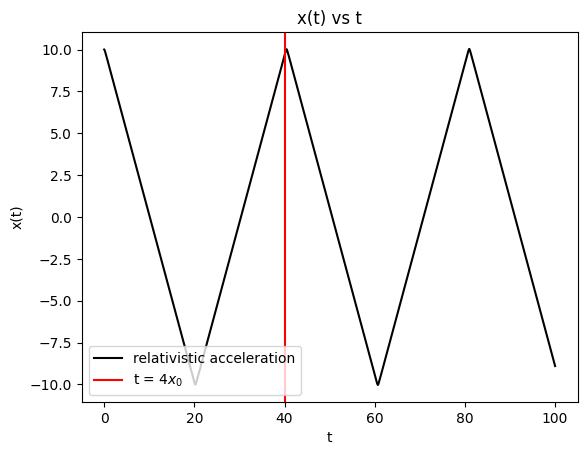

In [16]:
# this plot takes a lot of time to make
x_n, t_n,v_n = verlet(rel_acceleration, 10, 0, 0.001, 100000)#getting data using the verlet method
plt.plot(t_n, x_n, label = "relativistic acceleration", color = "black") #plotting the analytical method values
plt.axvline(x = 40, color = 'r', label = 't = $4x_{0}$') # Extreme relativistic period
plt.xlabel("t") #xlabel
plt.ylabel("x(t)")#ylabel
plt.title("x(t) vs t")#title
plt.legend()
plt.show()

The extreme relativistic case should be around $4*A$ where A is the initial condition for position which in this case is $x_{0} = 10$. Therefore the extreme relativistic case analytically should be at $t = 40$. When we plot $t = 40$ on the graph,We see that it almost passes through the tip. This tells us that the period is consistent with the triangles in the given graph and we should have such an extreme relative case at $t = 80$ as well. 

### * Multiple Position Graphs

<font color = blue>
Now create a single graph which include multiple different initial conditions: use $v_0 = 0$, but $x_0 \in \{0.1, 0.5, 1.0, 5.0, 10.0\}$.

C:\Users\manav\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


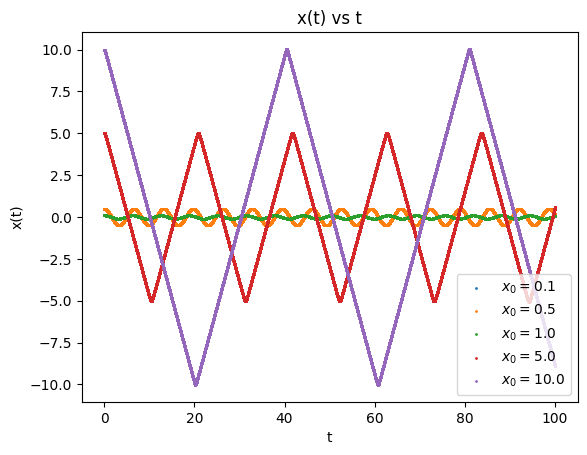

In [17]:
# this plot takes a lot of time to make
x_n1, t_n1, v_n1 = verlet(rel_acceleration, 0.1, 0, 0.001, 100000)#getting data using the verlet method
x_n2, t_n2, v_n2 = verlet(rel_acceleration, 0.5, 0, 0.001, 100000)#getting data using the verlet method
x_n3, t_n3, v_n3 = verlet(rel_acceleration, 0.1, 0, 0.001, 100000)#getting data using the verlet method
x_n4, t_n4, v_n4 = verlet(rel_acceleration, 5, 0, 0.001, 100000)#getting data using the verlet method
x_n5, t_n5, v_n5 = verlet(rel_acceleration, 10, 0, 0.001, 100000)#getting data using the verlet method
plt.scatter(t_n1, x_n1, label = "$x_0  = 0.1$", s = 1) #plotting position
plt.scatter(t_n2, x_n2, label = "$x_0  = 0.5$", s = 1) #plotting position
plt.scatter(t_n3, x_n3, label = "$x_0  = 1.0$", s = 1) #plotting position
plt.scatter(t_n4, x_n4, label = "$x_0  = 5.0$", s = 1) #plotting position
plt.scatter(t_n5, x_n5, label = "$x_0  = 10.0$", s = 1) #plotting position
plt.xlabel("t") #xlabel
plt.ylabel("x(t)")#ylabel
plt.title("x(t) vs t")#title
plt.legend()
plt.show()

The above plot is of position with different starting initial conditions. Here we see that the starting conditions with $x_{0}<1$ seem like a cosine curve (non -relativistic) whereas the $x_{0}>=1$ look like a triangle wave (relativistic).This plot also tells us that the period of the oscillator is heavily dependent on the initial value of position, $x_{0}$. We also see that the time period is still approximately $4x_{0}$ which is what we expected

### * Velocity Graphs

<font color = blue>
Use the lists of positions and times that you have just created to generate lists of velocities.  Create a single plot of these.

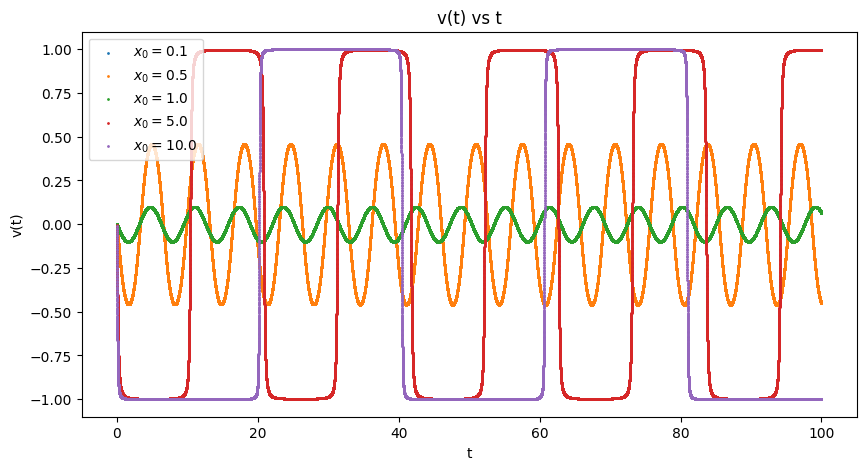

In [18]:
# this plot takes a lot of time to make
plt.figure(figsize=(10, 5)) #customizing the figure size
plt.scatter(t_n1, v_n1, label = "$x_0  = 0.1$", s = 1) #plotting velocity
plt.scatter(t_n2, v_n2, label = "$x_0  = 0.5$", s = 1) #plotting velocity
plt.scatter(t_n3, v_n3, label = "$x_0  = 1.0$", s = 1) #plotting velocity
plt.scatter(t_n4, v_n4, label = "$x_0  = 5.0$", s = 1) #plotting velocity
plt.scatter(t_n5, v_n5, label = "$x_0  = 10.0$", s = 1) #plotting velocity
plt.xlabel("t") #xlabel
plt.ylabel("v(t)")#ylabel
plt.title("v(t) vs t")#title
plt.legend()
plt.show()

In the velocity graph, just as we expected, the velocity also seems to be oscillating starting conditions with $x_{0}<1$ look like a negative sin curve (non -relativistic) whereas the $x_{0}>=1$ look like a box wave (relativistic). We also see here that in the relativistic case, the graph seems to plateau for a bit at the extremes -1,1 which is also in line with the fact that nothing can travel faster than the light in vacuum. The plateau means that the particle stops accelerating/ decelerating as it approaches the speed pf light in vacuum and then starts accelerating again in the opposite direction. 

## Any Other Problem: Damped Driven Pendulum

<font color = blue>
Come up with a physics problem (different from the ones analyzed above) that you can use the Verlet method to solve.  Write up a description of the problem below, and then apply the numerical technique to solve it.  Present your results graphically, and discuss their significance.

The equation for motion for a damped driven pendulum is described by the following equation:
$$mL^2 \ddot{\phi} = -bL^2\dot{\phi} -mgL\sin{\phi} +LF(t)$$
Here, $F(t)$ is the driving force which we can define as 
$$F(t) = F_{0}\cos{(\omega t)}$$
The driving strength $\gamma$ can be defined as 
$$\gamma = \frac{F_{0}}{mg}$$
This makes the driving strength, the ratio of the driving force to its weight $mg$
We can divide the equation of motion throughout by $mL^2$ and write the damping term $\frac{b}{m} =2\beta$ and the natural frequency $\omega_{0} = \sqrt{\frac{g}{L}}$
With all these modifications to our equation, we get a non dimensionalized version of it:

$$\ddot{\phi}+2\beta\dot{\phi}+\omega_{0}^{2}\sin{\phi}= \gamma \omega_{0}^{2} \cos{(\omega t)}$$

The above expression is a second order differential equation which cannot be solved analytically hence is perfect for our Numerical Verlet's approximation.

First and foremost, let us test our verlet function on this system by setting the driving strength, damping term to 0 essentially making it a simple pendulum. As we graph this, we should expect the position vs time graph to look similar to sine function with its amplitude at $\frac{\pi}{2}$ with a time period of $2\pi$. We should also expect the Velocity vs time graph to be similar to a cosine curve with the same amplitude time period. Both of these graphs will complete 1 oscillation at $\frac{5\pi}{2}$ as I have introduced a phase shift of $\frac{\pi}{2}$

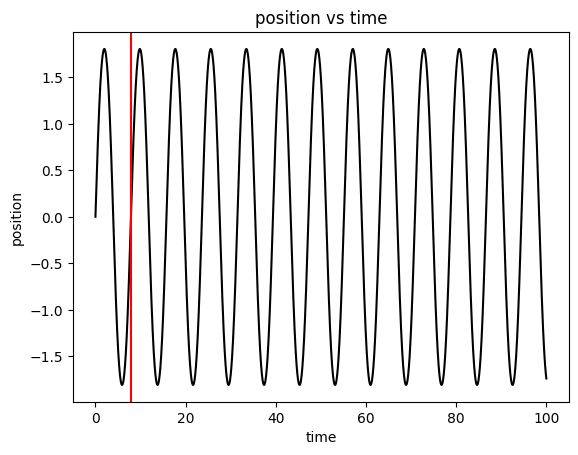

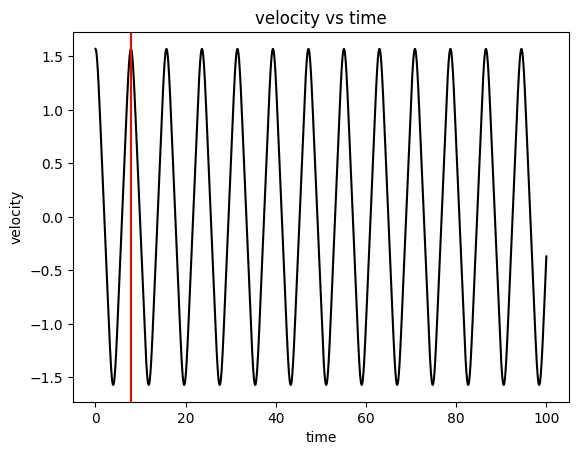

In [19]:
# this plot takes a lot of time to make
def ddpendulum(x, v, t): #mathematical function to describe the pendulum

    return gamma* omega_0**2 *np.cos(omega*t)-beta_2*v - omega_0**2 * np.sin(x)
    
gamma = 0 #drive strength
omega_0 = 1 #natural frequency
omega = 1 #angular dependence
beta_2 = 0 #damping   
x_n, t_n, v_n= verlet(ddpendulum, 0, math.pi/2, 0.001, 100000)#getting data using the verlet method

plt.plot(t_n, x_n, color = "black") #plotting the curve
plt.xlabel("time") #xlabel
plt.ylabel("position") #ylabel
plt.title("position vs time") #title
plt.axvline(x = 2*math.pi+ math.pi/2, color = 'r', label = 't = $4x_{0}$') # marking the time period
plt.show()
plt.plot(t_n, v_n, color = "black") #plotting the curve
plt.xlabel("time") #xlabel
plt.ylabel("velocity") #ylabel
plt.title("velocity vs time") #title
plt.axvline(x = 2*math.pi+ math.pi/2, color = 'r', label = 't = $4x_{0}$') # marking the time period
plt.show()

The graphs behave exactly as we predicted. Hence we know that our function for the damped driven pendulum works. 
Let us now focus on seeing interesting features in the position vs time plots in a damped driven pendulum.

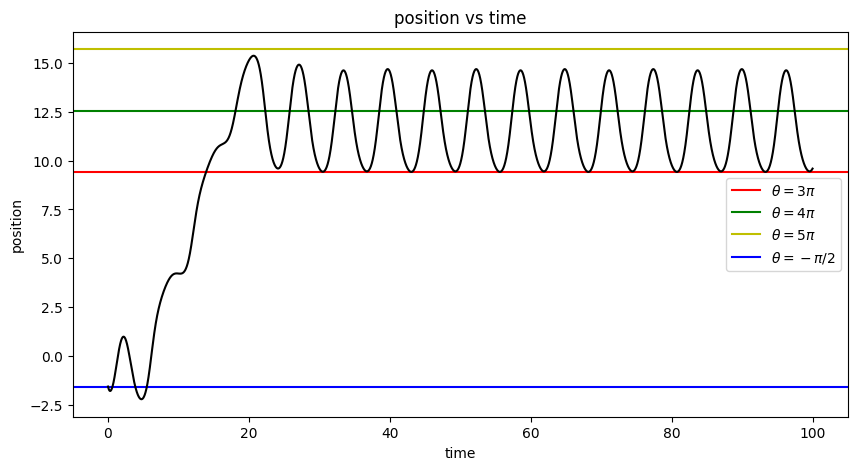

In [20]:
# this plot takes a lot of time to make
    
gamma = 1.0664#drive strength
omega_0 = 1.5#natural frequency
omega = 1#angular dependence
beta_2 =  0.75#damping    
x_n, t_n, v_n= verlet(ddpendulum, -math.pi/2, -math.pi/2, 0.001, 100000)#getting data using the verlet method
plt.figure(figsize=(10, 5))#customizing the figure size
plt.axhline(y = 3*math.pi, color = 'r', linestyle = '-',label = "$\\theta = 3\\pi$")
plt.axhline(y = 4*math.pi, color = 'g', linestyle = '-',label = "$\\theta = 4\\pi$")
plt.axhline(y = 5*math.pi, color = 'y', linestyle = '-',label = "$\\theta = 5\\pi$")
plt.axhline(y = -math.pi/2, color = 'b', linestyle = '-',label = "$\\theta = -\\pi/2$")
plt.plot(t_n, x_n, color = "black") #plotting the curve
plt.xlabel("time") #xlabel
plt.ylabel("position") #ylabel
plt.title("position vs time") #title
plt.legend()
plt.show()


In the plot above, I have changes the initial conditions such that there is a very big transient after which the plot seems to settle into its normal sinusoidal form with the amplitude almost being the same for all the other peaks outside of the transient. It is interesting to see that the minimum after the transient is approximately $3\pi$. This plot can be considered our first step proceeding towards. I will not try to change the initial conditions again in such a way that after a very long transient, we will not just one but two alternating peaks. 

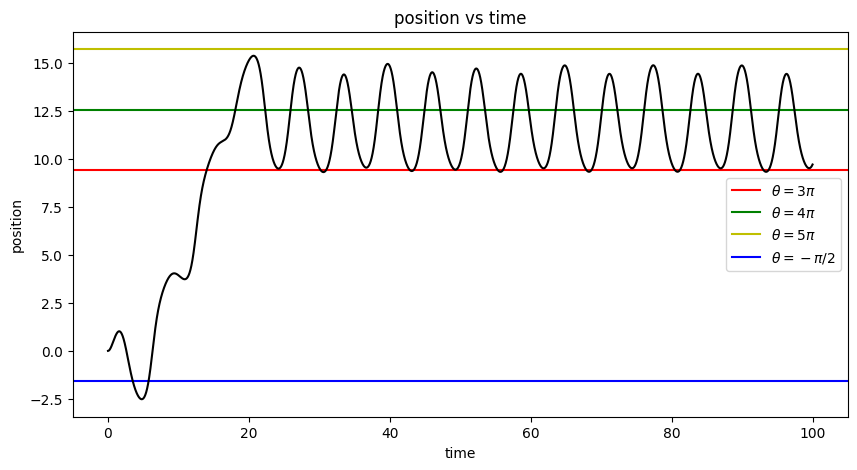

In [21]:
# this plot takes a lot of time to make
    
gamma = 1.0829#drive strength
omega_0 = 1.5#natural frequency
omega = 1 #angular dependence
beta_2 =  0.75   #damping
  
x_n, t_n, v_n= verlet(ddpendulum, 0,0, 0.001, 100000)#getting data using the verlet method
plt.figure(figsize=(10, 5))#customizing the figure size

plt.axhline(y = 3*math.pi, color = 'r', linestyle = '-',label = "$\\theta = 3\\pi$")
plt.axhline(y = 4*math.pi, color = 'g', linestyle = '-',label = "$\\theta = 4\\pi$")
plt.axhline(y = 5*math.pi, color = 'y', linestyle = '-',label = "$\\theta = 5\\pi$")
plt.axhline(y = -math.pi/2, color = 'b', linestyle = '-',label = "$\\theta = -\\pi/2$")
plt.plot(t_n, x_n, color = "black") #plotting the curve
plt.xlabel("time") #xlabel
plt.ylabel("position") #ylabel
plt.title("position vs time") #title
plt.legend()
plt.show()

By changing the initial condition again, we were able to plot a very similar graph to the last one with a long transient and 2 alternating peaks with different amplitudes. The graph again settles into a sinusodial between $3\pi$ and $5\pi$ just like last time. It is also possible to tweak the initial conditions in a way that we would have more than 2 alternating peaks. This would be a proper chaotic  system for which we could go further and make a bifurcation diagram. 